In [96]:
import numpy
import matplotlib.pyplot as plt
import gillespy2
from gillespy2 import Model, Species, Parameter, Reaction
from gillespy2.solvers.numpy.basic_ode_solver import ODESolver
from numpy import *
import pylab as p
import numpy as np
import pandas as pd
from numpy import array
import csv

In [97]:
class LotkaVolterra(gillespy2.Model):

     # Model setup
     def __init__(self):

          # Superclass initialization
          gillespy2.Model.__init__(self, name = "Lotka-Volterra")

          # Species
          predator = gillespy2.Species(name = "predator", initial_value = 125)
          prey = gillespy2.Species(name = "prey", initial_value = 375)
          food = gillespy2.Species(name = "food", initial_value = 1)
          predator_dead = gillespy2.Species(name = "dead_predator", initial_value = 0)
          self.add_species([predator, prey, food, predator_dead])

          # Parameters (rates)
          r_prey_reproduction = gillespy2.Parameter(name = "r_prey_reproduction", expression = 8)
          r_predation = gillespy2.Parameter(name = "r_predation", expression = 0.02)
          r_predator_death = gillespy2.Parameter(name = "r_predator_death", expression =8)
          self.add_parameter([r_prey_reproduction, r_predation, r_predator_death])

          # Reactions
          prey_reproduction = gillespy2.Reaction(name = "prey_reproduction",
                                                 reactants = {food: 1, prey: 1},
                                                 products = {food: 1, prey: 2},
                                                 rate = r_prey_reproduction)
          predation = gillespy2.Reaction(name = "predation",
                                         reactants = {predator: 1, prey: 1},
                                         products = {predator: 2, prey: 0},
                                         rate = r_predation)
          predator_death = gillespy2.Reaction(name = "predator_death",
                                              reactants = {predator: 1},
                                              products = {predator_dead: 1},
                                              rate = r_predator_death)
          self.add_reaction([prey_reproduction, predation, predator_death])

          # Set default timespan
          self.timespan(np.linspace(0, 10, 500))

          # Set list of species that should be plotted
          self.species_to_plot = ["predator", "prey", "food"]

In [98]:
model = LotkaVolterra()

In [99]:
results = model.run()
#put results in a csv file 

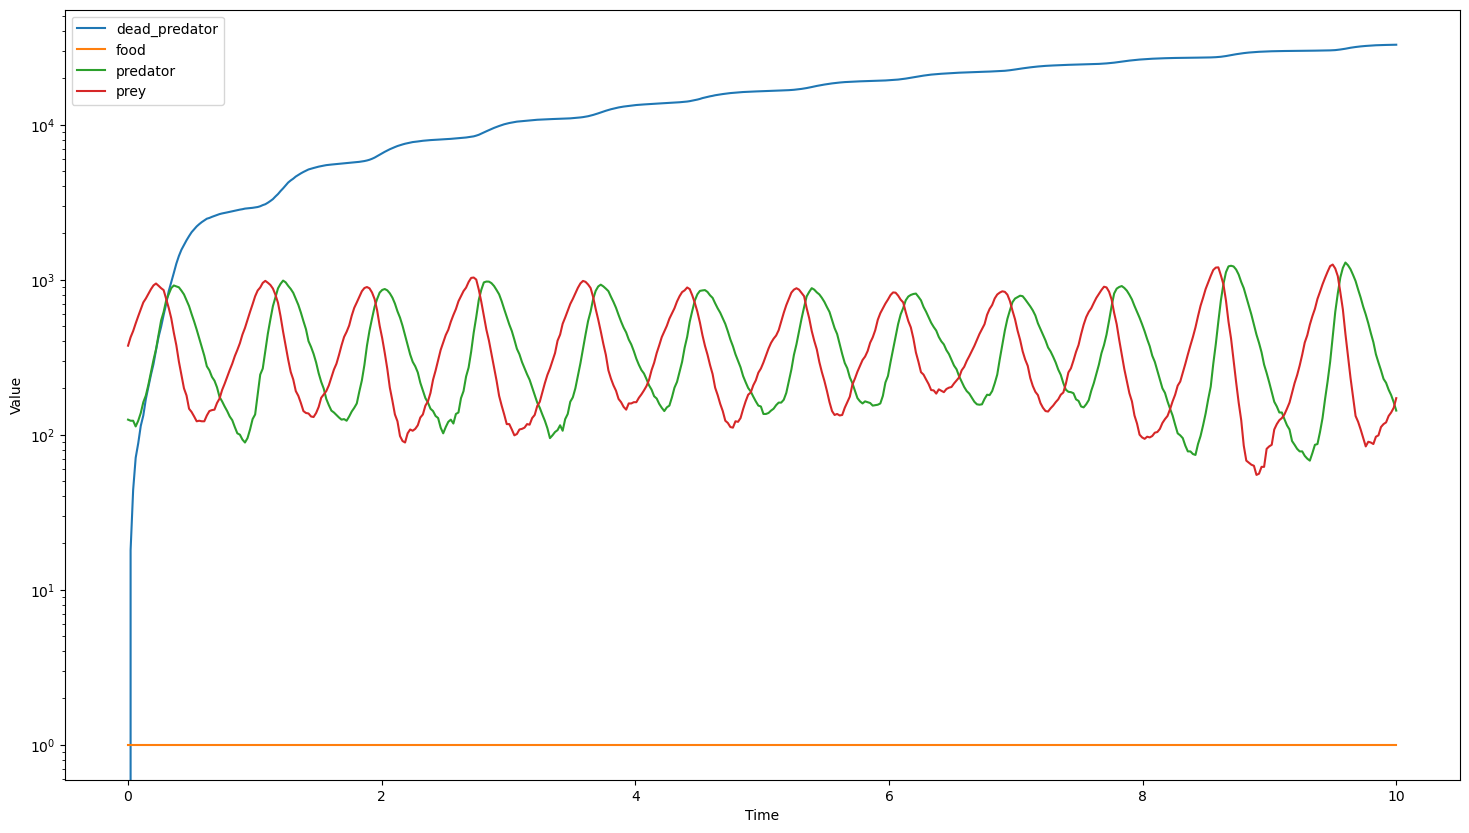

In [100]:
results.plot(yscale='log',xaxis_label='Time', yaxis_label="Value")

In [101]:
results

[{'time': array([ 0.       ,  0.0200401,  0.0400802,  0.0601202,  0.0801603,
        0.1002   ,  0.12024  ,  0.140281 ,  0.160321 ,  0.180361 ,
        0.200401 ,  0.220441 ,  0.240481 ,  0.260521 ,  0.280561 ,
        0.300601 ,  0.320641 ,  0.340681 ,  0.360721 ,  0.380762 ,
        0.400802 ,  0.420842 ,  0.440882 ,  0.460922 ,  0.480962 ,
        0.501002 ,  0.521042 ,  0.541082 ,  0.561122 ,  0.581162 ,
        0.601202 ,  0.621242 ,  0.641283 ,  0.661323 ,  0.681363 ,
        0.701403 ,  0.721443 ,  0.741483 ,  0.761523 ,  0.781563 ,
        0.801603 ,  0.821643 ,  0.841683 ,  0.861723 ,  0.881764 ,
        0.901804 ,  0.921844 ,  0.941884 ,  0.961924 ,  0.981964 ,
        1.002    ,  1.02204  ,  1.04208  ,  1.06212  ,  1.08216  ,
        1.1022   ,  1.12224  ,  1.14228  ,  1.16232  ,  1.18236  ,
        1.2024   ,  1.22244  ,  1.24248  ,  1.26253  ,  1.28257  ,
        1.30261  ,  1.32265  ,  1.34269  ,  1.36273  ,  1.38277  ,
        1.40281  ,  1.42285  ,  1.44289  ,  1.46293 

In [102]:
############################################
############################################
##turning results into a csv file##
###########################################
###########################################

In [103]:
data = []
data = results

test = data[0]

#test = test1.replace("array","numpy.array")
import csv
# create a csv file  test.csv and store
# it in a variable as outfile
with open("test.csv", "w") as outfile:
 
    # pass the csv file to csv.writer function.
    writer = csv.writer(outfile)
 
    # pass the dictionary keys to writerow
    # function to frame the columns of the csv file
    writer.writerow(test.keys())
   
    # make use of writerows function to append
    # the remaining values to the corresponding
    # columns using zip function.
    writer.writerows(zip(*test.values()))

In [104]:
#data[0]

In [105]:
#results[0]

In [106]:
#print(results)